In [296]:
import pandas as pd
import numpy as np
import seaborn as sns

#Dataset

In [297]:
df = pd.read_csv('COVID.csv')

In [298]:
df.shape

(5331, 5)

#Preprocessing

In [299]:
df.isnull().sum()

Date Administered                   0
AgeGroupVacc                        0
7-day_avg_group_cases_per_100k      0
Administered_Dose1_pct_agegroup     0
Series_Complete_Pop_pct_agegroup    0
dtype: int64

In [300]:
df.head()

,Date Administered,AgeGroupVacc,7-day_avg_group_cases_per_100k,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup
0,10/11/2022 12:00:00 AM,<2 Years,2.091826,0.052,0.017
1,10/11/2022 12:00:00 AM,12 - 17 Years,2.389293,0.711,0.608
2,10/11/2022 12:00:00 AM,25 - 49 Years,4.375377,0.840,0.710
3,10/10/2022 12:00:00 AM,<2 Years,2.888181,0.052,0.017
4,10/10/2022 12:00:00 AM,2 - 4 Years,3.362708,0.080,0.032


In [301]:
df[df['Series_Complete_Pop_pct_agegroup'] >= 0.7].shape

(1142, 5)

In [302]:
print(df['AgeGroupVacc'].value_counts())
print("_____________________________")
print(len(df['AgeGroupVacc'].unique()))

<2 Years         667
12 - 17 Years    667
25 - 49 Years    667
2 - 4 Years      666
5 - 11 Years     666
18 - 24 Years    666
50 - 64 Years    666
65+ Years        666
Name: AgeGroupVacc, dtype: int64
_____________________________
8


In [303]:
df.head()

,Date Administered,AgeGroupVacc,7-day_avg_group_cases_per_100k,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup
0,10/11/2022 12:00:00 AM,<2 Years,2.091826,0.052,0.017
1,10/11/2022 12:00:00 AM,12 - 17 Years,2.389293,0.711,0.608
2,10/11/2022 12:00:00 AM,25 - 49 Years,4.375377,0.840,0.710
3,10/10/2022 12:00:00 AM,<2 Years,2.888181,0.052,0.017
4,10/10/2022 12:00:00 AM,2 - 4 Years,3.362708,0.080,0.032


In [304]:
df.isnull().sum()

Date Administered                   0
AgeGroupVacc                        0
7-day_avg_group_cases_per_100k      0
Administered_Dose1_pct_agegroup     0
Series_Complete_Pop_pct_agegroup    0
dtype: int64

#Feature Selection

In [305]:
df['Immunity'] = (df["7-day_avg_group_cases_per_100k"] < 3) & (df['Series_Complete_Pop_pct_agegroup'] > 0.7)

df.head()

,Date Administered,AgeGroupVacc,7-day_avg_group_cases_per_100k,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Immunity
0,10/11/2022 12:00:00 AM,<2 Years,2.091826,0.052,0.017,False
1,10/11/2022 12:00:00 AM,12 - 17 Years,2.389293,0.711,0.608,False
2,10/11/2022 12:00:00 AM,25 - 49 Years,4.375377,0.840,0.710,False
3,10/10/2022 12:00:00 AM,<2 Years,2.888181,0.052,0.017,False
4,10/10/2022 12:00:00 AM,2 - 4 Years,3.362708,0.080,0.032,False


In [306]:
df['Immunity'].value_counts()

one = (df["Immunity"].value_counts()[1].sum()/df["Immunity"].value_counts()[0].sum()) * 100

print(f"Percentage of values which are one: {round(one, 2)}")

Percentage of values which are one: 0.47


##Correlation Matrix

In [307]:
corr_matrix = df.corr()

print(corr_matrix)

                                  7-day_avg_group_cases_per_100k  \
7-day_avg_group_cases_per_100k                          1.000000   
Administered_Dose1_pct_agegroup                         0.068510   
Series_Complete_Pop_pct_agegroup                        0.062031   
Immunity                                               -0.052589   

                                  Administered_Dose1_pct_agegroup  \
7-day_avg_group_cases_per_100k                           0.068510   
Administered_Dose1_pct_agegroup                          1.000000   
Series_Complete_Pop_pct_agegroup                         0.992843   
Immunity                                                 0.082536   

                                  Series_Complete_Pop_pct_agegroup  Immunity  
7-day_avg_group_cases_per_100k                            0.062031 -0.052589  
Administered_Dose1_pct_agegroup                           0.992843  0.082536  
Series_Complete_Pop_pct_agegroup                          1.000000  0.089751

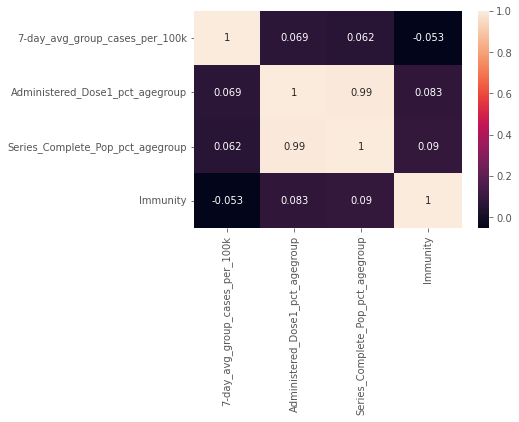

In [308]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

##Importance

In [309]:
print(df.columns)

Index(['Date Administered', 'AgeGroupVacc', '7-day_avg_group_cases_per_100k',
       'Administered_Dose1_pct_agegroup', 'Series_Complete_Pop_pct_agegroup',
       'Immunity'],
      dtype='object')


In [310]:
df.dtypes

Date Administered                    object
AgeGroupVacc                         object
7-day_avg_group_cases_per_100k      float64
Administered_Dose1_pct_agegroup     float64
Series_Complete_Pop_pct_agegroup    float64
Immunity                               bool
dtype: object

In [311]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the model
rf = RandomForestRegressor()

# Fit the model on the data
rf.fit(df[['Series_Complete_Pop_pct_agegroup']], df['Immunity'])

# Get the feature importance that column
importance = rf.feature_importances_

print("Importance of series column: ", importance)

Importance of series column:  [1.]


In [312]:
rf.fit(df[['7-day_avg_group_cases_per_100k']], df['Immunity'])

# Get the feature importance that column
importance = rf.feature_importances_

print("Importance of 7 day avg column: ", importance)

Importance of 7 day avg column:  [1.]


##Target Variable

In [313]:
one = df[df['Immunity'] == 1]

zero = df[df['Immunity'] == 0]

zero = zero.iloc[5200:]

final_df = pd.concat([one, zero], ignore_index=True)

df  = final_df.drop("Date Administered", axis=1)

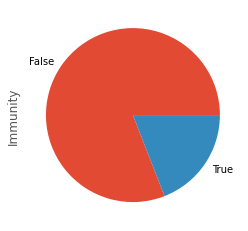

In [314]:
Immunity = df['Immunity'].value_counts()

Immunity.plot(kind='pie')

#Machine Learning Techniques

##Data Preprocessing for Algorithms

In [315]:
print(df['AgeGroupVacc'].value_counts())
print("_____________________________")
print(len(df['AgeGroupVacc'].unique()))

65+ Years        39
50 - 64 Years    14
<2 Years         13
2 - 4 Years      13
5 - 11 Years     13
12 - 17 Years    13
18 - 24 Years    13
25 - 49 Years    13
Name: AgeGroupVacc, dtype: int64
_____________________________
8


In [316]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['AgeGroupVacc'] = le.fit_transform(df.AgeGroupVacc.values)

In [317]:
df.head()

,AgeGroupVacc,7-day_avg_group_cases_per_100k,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Immunity
0,6,2.997824,0.882,0.812,True
1,6,2.918808,0.882,0.811,True
2,6,2.921980,0.881,0.810,True
3,6,2.980911,0.881,0.810,True
4,6,2.983818,0.880,0.809,True


##Random Forest

In [318]:
#Seperating features and labels
X = df.iloc[:, :1].values
y = df.iloc[:, -1].values

# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [319]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()

RF_acc = metrics.accuracy_score(y_test, y_pred)*100
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", RF_acc)


ACCURACY OF THE MODEL:  93.93939393939394


##Support Vector machine

In [320]:
#Seperating features and labels
X = df.iloc[:, :1].values
y = df.iloc[:, -1].values


# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [321]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [322]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

SVM_acc = metrics.accuracy_score(y_test, y_pred)*100
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", SVM_acc)

Accuracy: 81.81818181818183


##Logistics Regression/Linear Classification

In [323]:
#Seperating features and labels
X = df.iloc[:, :3].values
y = df.iloc[:, -1].values


# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [324]:
from sklearn.linear_model import LogisticRegression

log_Regressor = LogisticRegression()
log_Regressor.fit(X_train , y_train)

LogisticRegression()

In [325]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

LR_acc = metrics.accuracy_score(y_test, y_pred)*100
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", LR_acc)

Accuracy: 81.81818181818183


##Gaussian Naive Bayes

In [326]:
#Seperating features and labels
X = df.iloc[:, :1].values
y = df.iloc[:, -1].values


# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [327]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)

NB_acc = metrics.accuracy_score(y_test, y_pred)*100
# Accuracy of the model
print("ACCURACY OF THE MODEL: ", NB_acc)

ACCURACY OF THE MODEL:  87.87878787878788


##XG Boost

In [328]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

import xgboost as xgb

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [330]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
print(); print(model)


XGBClassifier()


In [331]:
expected_y  = y_test
predicted_y = model.predict(X_test)

print(metrics.classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

       False       0.70      1.00      0.82        23
        True       0.00      0.00      0.00        10

    accuracy                           0.70        33
   macro avg       0.35      0.50      0.41        33
weighted avg       0.49      0.70      0.57        33



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [332]:
XG_acc = metrics.accuracy_score(expected_y, y_pred)*100

print("ACCURACY OF THE MODEL: ", XG_acc)

ACCURACY OF THE MODEL:  42.42424242424242


##Accuracy of all algorithms

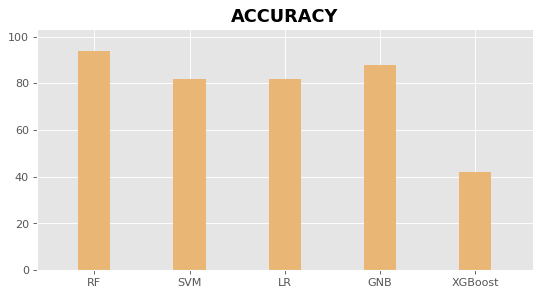

In [333]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(8, 4), dpi=80)

# Create an array of 5 values
data = np.round(np.array([RF_acc, SVM_acc, LR_acc, NB_acc, XG_acc]))

# Specify the x-axis labels
labels = ['RF', 'SVM', 'LR', 'GNB', 'XGBoost']

# Colors
colors = ['#eab676']

# Create the histogram plot
plt.bar(labels, data, color=colors, width=0.34)

# Add values to each bar
# for i, v in enumerate(data):
#     plt.text(i, v, str(v), color='black', ha='center')

# Add title and labels
plt.title("ACCURACY", size=16, fontweight="bold")

# Set Margins
plt.margins(x=0.1, y=0.1)

# Hide grid lines
# plt.grid(False)

# Hide axes ticks
# plt.xticks([])
# plt.yticks([])

# Show the plot
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316:

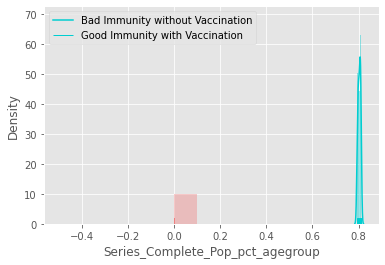

In [334]:
plt.figure()
ax = sns.distplot(df['Series_Complete_Pop_pct_agegroup'][df.Immunity == 1], color = 'darkturquoise', rug=True)
sns.distplot(df['Series_Complete_Pop_pct_agegroup'][df.Immunity == 0], color = 'lightcoral', rug=True)
plt.legend(['Bad Immunity without Vaccination', "Good Immunity with Vaccination"])